In [2]:
import pandas as pd

Credit_Card= pd.read_csv("Downloads/credit card clients.csv")


Credit_Card.head(2)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1


In [3]:
new_header = Credit_Card.iloc[0] #grab the first row for the header
Credit_Card = Credit_Card[1:] #take the data less the header row
Credit_Card.columns = new_header #changed

In [4]:
Credit_Card.head() #show first five rows

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
Credit_Card.shape #show the shape
#Credit_Card.info()

(30000, 25)

In [6]:
#Seperating the credit data into 70% training data and 30% testing data
data = Credit_Card.sample(frac=0.7, random_state=786)
data_unseen = Credit_Card.drop(data.index).reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

#showing the size of the data
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (21000, 25)
Unseen Data For Predictions: (9000, 25)


In [7]:
#importing the library
from pycaret.classification import *

In [8]:
credit_card_model = setup(data = data, target = 'default payment next month', session_id=123)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(21000, 25)"
4,Missing Values,False
5,Numeric Features,15
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [9]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.818700,0.000000,0.350800,0.682100,0.462900,0.367200
1,Linear Discriminant Analysis,0.818500,0.763600,0.371300,0.668000,0.476700,0.377600
2,Extreme Gradient Boosting,0.817300,0.777500,0.347800,0.675800,0.458600,0.362200
3,Light Gradient Boosting Machine,0.816900,0.772600,0.355400,0.667800,0.463500,0.365400
4,Gradient Boosting Classifier,0.816700,0.776700,0.352100,0.669400,0.460800,0.363100
5,CatBoost Classifier,0.816600,0.777700,0.360600,0.663800,0.466500,0.367500
6,Ada Boost Classifier,0.814500,0.768000,0.334100,0.668600,0.444800,0.348300
7,Extra Trees Classifier,0.808200,0.751000,0.361200,0.620100,0.456200,0.349500
8,Random Forest Classifier,0.806000,0.736000,0.321600,0.627300,0.424500,0.322300
9,Logistic Regression,0.777000,0.640700,0.000000,0.000000,0.000000,0.000000


In [10]:
decision_tree = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7252,0.6279,0.4526,0.3968,0.4229,0.2435
1,0.7034,0.5961,0.4024,0.3548,0.3771,0.1835
2,0.7401,0.6306,0.4329,0.4201,0.4264,0.2585
3,0.7340,0.6376,0.4634,0.4142,0.4374,0.2640
4,0.7293,0.6182,0.4177,0.3983,0.4077,0.2324
5,0.7395,0.6107,0.3780,0.4092,0.3930,0.2275
6,0.7218,0.5960,0.3689,0.3746,0.3717,0.1931
7,0.7252,0.6188,0.4268,0.3933,0.4094,0.2307
8,0.7238,0.6201,0.4329,0.3923,0.4116,0.2317
9,0.7243,0.6230,0.4404,0.3934,0.4156,0.2359


In [11]:
print(decision_tree)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [12]:
#K_Neighbors= create_model('knn')

In [13]:
#print(K_Neighbors)

In [14]:
tuned_decision_tree = tune_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7789,0.7024,0.3609,0.5043,0.4207,0.2887
1,0.7803,0.6952,0.3232,0.5121,0.3963,0.2703
2,0.7857,0.6910,0.3567,0.5294,0.4262,0.3006
3,0.7844,0.6946,0.4024,0.5217,0.4544,0.3228
4,0.7878,0.6772,0.2805,0.5476,0.3710,0.2590
5,0.7735,0.6832,0.2805,0.4868,0.3559,0.2303
6,0.8014,0.7071,0.3659,0.5882,0.4511,0.3378
7,0.7721,0.6545,0.2988,0.4828,0.3691,0.2393
8,0.7871,0.6754,0.3262,0.5377,0.4061,0.2857
9,0.7869,0.6956,0.3486,0.5327,0.4214,0.2978


In [15]:
print(tuned_decision_tree)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=68, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


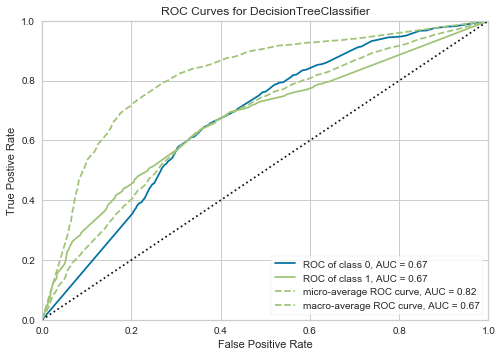

In [16]:
plot_model(tuned_decision_tree, plot = 'auc')

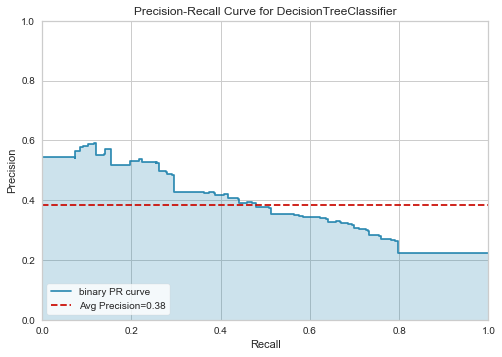

In [17]:
plot_model(tuned_decision_tree, plot = 'pr')

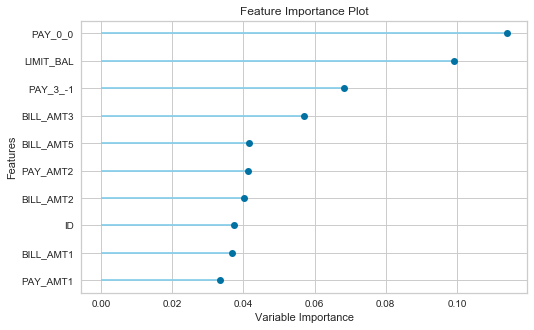

In [18]:
plot_model(tuned_decision_tree, plot='feature')

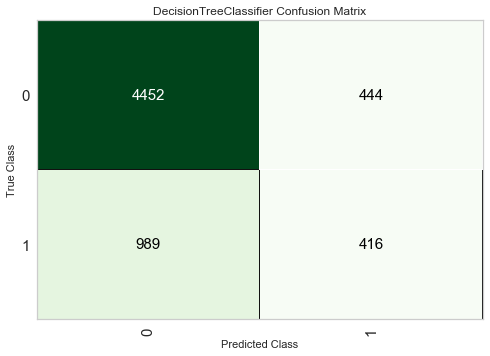

In [19]:
plot_model(tuned_decision_tree, plot = 'confusion_matrix')

In [20]:
evaluate_model(tuned_decision_tree)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [21]:
predict_model(tuned_decision_tree);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Decision Tree Classifier,0.7726,0.6716,0.2961,0.4837,0.3673,0.2384


In [22]:
decision_tree_final_model = finalize_model(tuned_decision_tree)

In [23]:
print(decision_tree_final_model)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=68, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [24]:
predict_model(decision_tree_final_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Decision Tree Classifier,0.8476,0.886,0.4626,0.7602,0.5752,0.489


In [25]:
unseen_predictions = predict_model(decision_tree_final_model, data=data_unseen)
unseen_predictions.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Label,Score
0,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,0,0.4000
1,6,50000,1,1,2,37,0,0,0,0,...,20024,2500,1815,657,1000,1000,800,0,0,0.2857
2,13,630000,2,2,2,41,-1,0,-1,-1,...,2870,1000,6500,6500,6500,2870,0,0,0,0.2500
3,14,70000,1,2,2,30,1,2,2,0,...,36894,3200,0,3000,3000,1500,0,1,0,0.5000
4,15,250000,1,1,2,29,0,0,0,0,...,55512,3000,3000,3000,3000,3000,3000,0,0,0.0000


In [26]:
save_model(decision_tree_final_model,'Model Analysis')

Transformation Pipeline and Model Succesfully Saved


In [27]:
saved_decision_tree = load_model('Model Analysis')

Transformation Pipeline and Model Sucessfully Loaded


In [28]:
new_prediction_model = predict_model(saved_decision_tree, data=data_unseen)

In [29]:
new_prediction_model

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Label,Score
0,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,0,0.4000
1,6,50000,1,1,2,37,0,0,0,0,...,20024,2500,1815,657,1000,1000,800,0,0,0.2857
2,13,630000,2,2,2,41,-1,0,-1,-1,...,2870,1000,6500,6500,6500,2870,0,0,0,0.2500
3,14,70000,1,2,2,30,1,2,2,0,...,36894,3200,0,3000,3000,1500,0,1,0,0.5000
4,15,250000,1,1,2,29,0,0,0,0,...,55512,3000,3000,3000,3000,3000,3000,0,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,29985,30000,1,2,2,38,-1,-1,-2,-1,...,3319,923,2977,1999,3057,3319,1000,0,0,0.0000
8996,29988,130000,1,1,2,34,0,0,0,0,...,97353,3000,2000,93000,4000,5027,4005,0,0,0.1429
8997,29995,80000,1,2,2,34,2,2,2,2,...,81158,7000,3500,0,7000,0,4000,1,1,0.8684
8998,29998,30000,1,2,2,37,4,3,2,-1,...,19357,0,0,22000,4200,2000,3100,1,0,0.0000
